In this post, I'll walk through a solution to FiveThirtyEight's [Riddler Classic problem from last week](https://fivethirtyeight.com/features/can-you-catch-the-free-t-shirt/). In this problem, we are asked to consider a spam comment generation process. In this process, spam replies will respond to an initial post and to each subsequently generated spam reply. Spam will accumulate on each post/reply according to identical independent [Poisson processes](https://en.wikipedia.org/wiki/Poisson_point_process) with a common rate of one comment per day (refer to the <a href="#original_prompt">original prompt</a> for a more clear explanation). We are asked: how many spam posts can we expect to have after three days?

My solution will have two pieces. First, I'll give an <a href="#exact_solution">exact solution</a> (although some details will be left "to the reader"), and then I'll <a href="simulation_solution">simulate the result</a> to validate my exact solution. The final <a href="#final_results">validation results</a> are at the end.

For reference, I have copied the <a id ="original_prompt"></a> verbatim below:

>Last week’s Riddler column garnered six comments on Facebook. However, every single one of those comments was spam. Sometimes, spammers even reply to other spammers’ comments with yet more spam. This got me thinking.
>
>Over the course of three days, suppose the probability of any spammer making a new comment on this week’s Riddler column over a very short time interval is proportional to the length of that time interval. (For those in the know, I’m saying that spammers follow a Poisson process.) On average, the column gets one brand-new comment of spam per day that is not a reply to any previous comments. Each spam comment or reply also gets its own spam reply at an average rate of one per day.
>
>For example, after three days, I might have four comments that were not replies to any previous comments, and each of them might have a few replies (and their replies might have replies, which might have further replies, etc.).
>
>After the three days are up, how many total spam posts (comments plus replies) can I expect to have?

## Exact Solution <a id="exact_solution"></a>

Throughout this discussion, we will let $X_n$ denote the random interrarival time between the $(n-1)^{th}$ and $n^{th}$ spam comments (for notational convenience, we let $X_0 = 0$ denote the start of the process). We will let $S_n$ denote the time of the $n^{th}$ arrival, which is just the sum of the inter-arrival times, $S_n = \sum_{k=1}^n X_k$. To keep things a bit more general than in the original prompt, we'll let $\lambda$ denote the per-comment spam arrival rate, and let $T$ denote the time window during which we observe spam arrivals. We will let $N(T)$ denote the number of spam comments that we observe by time $T$. To be pedantic, let us observe that $N(T)$ is a random variable that takes on non-zero integral values (it represents a count  after all &#128578;). With this notation in mind, the problem statement can be rephrased as: compute $E[N(T)]$. 

To compute $E[N(T)]$, we will proceed as follows:
1. Specify the distribution of the interarrival times $X_n$ for $n \geq 1$. <a href="#density_of_X">[See here]</a>
2. Directly compute $P(N(T) = n)$.  <a href="#exact_prob_N">[See  here]</a>
3. Directly compute $E[N(T)]$, i.e. using $E[N(T)] = \sum_{n=0}^{\infty} n \cdot P(N(T) = n)$. <a href="#exact_mean_N">[See  here]</a>

I haven't really considered whether there is a simpler approach to computing the expectation or not - i.e. I couldn't think of a more clever solution!

### Density of $X_n$ <a id="density_of_X"></a>

Once there are $n-1$ comments/replies, the $n^{th}$ spam post will either be a response to either the initial post or one of the $n-1$ comments/replies. Since responses to each post/comment/reply arrive according to indepedent identical Poisson processes, each with rate $\lambda$, we see that $X_{n}$ will be the minimum of $n$ i.i.d. $\text{Exp}(\lambda)$ random variables. Thus, by a standard fact about the [minimum of i.i.d. exponential R.V.'s](https://en.wikipedia.org/wiki/Exponential_distribution#Distribution_of_the_minimum_of_exponential_random_variables),  we have:

$$ X_{n} \sim \text{Exp}(n\lambda) \text{ for $n \geq 1$}. $$

Letting $f_n$ denote the p.d.f. for $X_n$, and $F_n(t)$ its c.d.f., then for $t \geq 0$ [we have](https://en.wikipedia.org/wiki/Exponential_distribution#Probability_density_function):

$$ f_n(t) = (\lambda n) e^{-\lambda n t} $$

and

$$ F_n(t) = 1 - e^{-\lambda t} $$

### Computing $P(N(T) = n)$ <a id="exact_prob_N"></a>

Computing $P(N(T) = n)$ is tedious but tractable in general. I will "leave it to the reader" to fill out the general case, but will compute the exact value for $n=0,1,2$ (basically, I couldn't think of a clever trick to quickly obtain the general case.

#### Case $n = 0$
Note that $N(T) = 0$ just in case $X_1 > T$. Thus $P(N(T) = 0) = P(X_1 > 0) = 1 - (1 - e^{-\lambda T})$ so,

$$ P(N(T) = 0) = \boxed{e^{-\lambda T}}$$


#### Case $n = 1$
Note that $N(T) = 1$ just in case $X_1 \leq T$ and $X_2 + X_1 > T$. So:

$$\begin{array}{rl} P(N(T) = 1) &= P\left(X_1 \leq T\text{ and }X_1 + X_2 > T \right)\\
&=\int_0^T f_1(t)\cdot P(t + X_2 > T)\,dt\\
&=\int_0^T f_1(t)\cdot P(X_2 > T - t)\,dt\\
&=\int_0^T f_1(t)\cdot (1 - F_2(T - t))\,dt\\
&=\int_0^T \lambda e^{-\lambda t}e^{-2\lambda(T - t)}\,dt\\
&=e^{-2\lambda T}\int_0^T \lambda e^{\lambda T}\,dt \\
&=\boxed{e^{-\lambda T}\cdot (1 - e^{-\lambda T})}
  \end{array}$$

#### Case $n = 2$
Note that $N(T) = 2$ just in case $X_1 + X_2 \leq T$ and $X_1 + X_2 + X_3 > T$. So:

$$\begin{array}{rl} P(N(T) = 2) &= P\left(X_1 + X_2 \leq T\text{ and }X_1 + X_2 + X_3 > T \right)\\
&=\int_0^{T} \int_0^{T - t_1} f_1(t_1)\cdot f_2(t_2)\cdot P(t_1 + t_2 + X_3 > T)\,dt_2\,dt_1\\
&=\int_0^{T} \int_0^{T - t_1} f_1(t_1)\cdot f_2(t_2)\cdot (1 - F_3(T - t_1 - t_2))\,dt_2\,dt_1\\
&=\int_0^{T} \int_0^{T - t_1} \lambda e^{-\lambda t_1} \cdot 2\lambda e^{-2\lambda t_2}\cdot e^{-3 \lambda (T - t_1 - t_2)}\,dt_2\,dt_1\\
&=e^{-3 \lambda T}\int_0^T \int_0^{T - t_1} \lambda e^{2\lambda t_1} \cdot 2\lambda e^{\lambda t_2} \,dt_2\,dt_1\\
&=e^{-3 \lambda T}\int_0^T 2\lambda e^{2\lambda t_1} \int_0^{T - t_1} \lambda e^{\lambda t_2} \,dt_2\,dt_1\\
&=e^{-3 \lambda T}\int_0^T 2\lambda e^{2\lambda t_1} (e^{\lambda(T-t_1)} - 1) \,dt_1\\
&=2 e^{-2 \lambda T} \int_0^T \lambda e^{\lambda t_1} \,dt_1 -  e^{-3 \lambda T}\int_0^T 2\lambda e^{2\lambda t_1} \,dt_1\\
&=2 e^{-2 \lambda T} (e^{\lambda T} - 1) -  e^{-3 \lambda T} (e^{2\lambda T} - 1)\\
&= e^{-\lambda T} - 2e^{-2 \lambda T} + e^{-3 \lambda T}\\
&=\boxed{e^{-\lambda T}\cdot (1 - e^{-\lambda T})^2}
  \end{array}$$

#### General $n$ (by hand-waving)

The pattern above allows us to conjecture that, in general:

$$ \boxed{P(T(N) = n) = e^{-\lambda T} \cdot (1 - e^{-\lambda T})^n} $$

This should be possible to verify pretty easily, but I didn't bother to do it. We will proceed as if I *had* though &#128578;.

### Computing $E[N(T)]$ <a id="exact_mean_N"></a>

With a bit of hand-waving, we showed above that $P(N(T) = n) = e^{-\lambda T} \cdot (1 - e^{-\lambda T})^n$. Hence,

$$ \begin{array}{cl} E[N(T)] &= \sum_{n=0}^\infty n \cdot P(N(T) = n)\\
  &= e^{-\lambda T} \cdot \sum_{n=1}^\infty n (1 - e^{-\lambda T})^n \\
  &= e^{-\lambda T} \cdot \frac{(1 - e^{-\lambda T})}{(1 - (1 - e^{-\lambda T}))^2} \\  
  &= \frac{(1 - e^{-\lambda T})}{e^{-\lambda T}} \\    
  &= e^{\lambda T} - 1  
\end{array}$$

So the average number of spam comments by time $T$ for a spam process of mean $\lambda$ is:

$$ E[N(T)] = e^{\lambda T} - 1  $$

For the case considered in the prompt, we have $\lambda = 1$, and $T = 3$, so the solution to the prompt is:

$$ \boxed{E[N(T_{prompt})] = e^3 - 1 \approx 19.0855}$$

## Simulation Solution <a id="simulation_solution"></a>

In this section, we will simulate the process. Because I completed this section *before* I reasoned through the exact approach, my approach here is a bit different from above. Instead of utilizing the observation that the $n^{th}$ inter-arrival time is distributed by an $\text{Exp}(n\lambda)$ process (which could result in much more efficient simulations), I just used the fact that responses to each comment/reply follow a Poisson process with rate $\lambda$. This perspective can be accomodated by arranging responses according to the reply tree structure (i.e. by organizing each reply according to which comment or post it is a reply to).

To perform the simulation, we will simulate the number / time of each direct responses that each comment/reply will receive prior to time $T$. This process is iterated for each child and all of its descendants until we run out of responses prior to time $T$. 

To simulate the number / time of direct responses that each post/comment/reply will receive, we use the standard approach [described here](https://en.wikipedia.org/wiki/Poisson_point_process#Simulation). That is, we use the fact that the number of direct responses, $N_c$, that a comment/reply/post created at time $t$ will have in the window $[t,T]$ is a Poisson r.v., and in particular $N_{c} \sim \text{Poisson}(\lambda \cdot (T - t))$. The arrival times for its children can then be simulated by generating $N_c$ uniform R.V.'s on the interval $[t, T]$. We repeat this process to generate child responses for each comment until we run out of children. The number of total comments is the count of all children generated, which we compute recursively using the tree structure.

In [1]:
import numpy as np
from scipy.stats import poisson, uniform, linregress
import matplotlib.pyplot as plt
import seaborn as sns
import secrets
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pathos.multiprocessing as mp
import pandas as pd

Here we give a class to represent the comment trees. The tree is represented by a root node which has no parent.

In [2]:
class ResponseNode:
    def __init__(self, time=None, parent_id = None):
        self.parent_id = parent_id
        self.id = secrets.token_hex(nbytes=4)
        if time is None:
            time = 0
        self.time = time
        self.children = []

    def __str__(self):
        rslt = 'id: {} parent_id: {} time: {:0.05f}\tn_direct_children: {}\n'.format(
            self.id, self.parent_id, self.time, len(self.children))
        for c in self.children:
            rslt = rslt + c.__str__()
        return rslt
        
    def countChildren(self):
        if self.children:
            return len(self.children) + sum([c.countChildren() for c in self.children])
        else:
            return 0
        
    def addChildByTime(self, tc):
        childNode = ResponseNode(time = tc, parent_id = self.id)
        self.children.append(childNode)
        
        return childNode
        
            

The following function simulates the tree of responses for a single seed post.

In [3]:
def simulate_responses(Tf, respNode = None, mu=1):
    if respNode is None:
        respNode = ResponseNode()
        
    T0 = respNode.time    
    responses = []
    n_comments = poisson.rvs(mu * (Tf-T0), size=1)    
    t_comments = uniform.rvs(loc=T0, scale = (Tf-T0), size=n_comments)

    for t in t_comments:
        childNode = respNode.addChildByTime(t)          
        simulate_responses(Tf, childNode, mu)        
        
    return respNode.countChildren()

The following function is used to graph a single spam tree, and does not impact the final simulation.

In [4]:
def graph_from_tree(node, G = None):
    if G == None:
        G = nx.Graph()
    
    #node_label = (node.id, '{0:0.4f}'.format(node.time))
    node_label = '{0:0.3f}'.format(node.time)
    
    if not G.has_node(node_label):
        G.add_node(node_label)
        
    for c in node.children:
        #child_label = (c.id, '{0:0.4f}'.format(c.time))
        child_label = '{0:0.3f}'.format(c.time)
        
        G.add_node(child_label)
        G.add_edge(node_label, child_label)
        
        graph_from_tree(c, G)
        
    return G

### Tree example

Here we provide a graph of a single spam tree on the window $[0,3]$. The numbers on the nodes represent the time each comment was observed. The root node corresponds to the seed post which is posted at time $0$.

There were a total of 14 spam replies in this simulation.


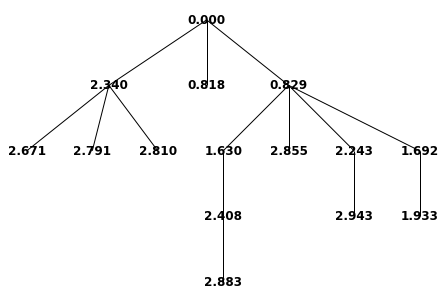

In [5]:
# Generate a process
np.random.seed(1234)
rootNode = ResponseNode()
simulate_responses(Tf = 3, respNode = rootNode);

# Plot the process
G = graph_from_tree(rootNode)
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, node_size=0, font_weight='bold', with_labels=True, arrows=False)

# How many children?
print("There were a total of {} spam replies in this simulation.".format(rootNode.countChildren()))

### Simulation

Here we will simulate the process for $T = 1,\ldots,6$, with rate $\lambda = 1$. Due to inefficiency of the simulation / the exponential trend in number of comments, we limit our number of simulations to $50,000$ runs.

In [6]:
n_simulations = 5e4
T_max = 6

In [7]:
%%time
sim_rslts = dict()
sim_means = dict()

for Tf in range(1, T_max + 1):
    with mp.Pool(12) as p:
        sim_rslts[Tf] = p.map(lambda x: simulate_responses(Tf = Tf), 
                              np.arange(n_simulations))
        sim_means[Tf] = np.mean(sim_rslts[Tf])

CPU times: user 6 s, sys: 184 ms, total: 6.19 s
Wall time: 3min 45s


Just because we have it, here's a plot of the distribution of total spam responses.

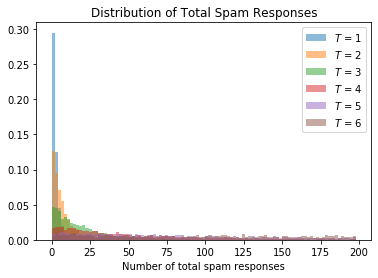

In [8]:
fig, ax = plt.subplots()

for Tf in range(1, T_max+1):
    ax.hist(sim_rslts[Tf], bins=np.arange(0,200,2), density=True, alpha=0.5, label="$T$ = {}".format(Tf))        
ax.legend()
ax.set_title("Distribution of Total Spam Responses")
ax.set_xlabel("Number of total spam responses")
plt.show()

## Results Validation <a id="final_results"></a>

The following table compares the exact vs simulated mean number of spam messages observed by time $T$ for $T=1,\ldots,6$ - and demonstrates the exact results are likely correct &#128578;.

In [9]:
df_rslts = pd.DataFrame({'T' : list(sim_means.keys()), 'simulated_mean_spam_cnt' : list(sim_means.values())})
df_rslts['exact_mean_spam_cnt'] = np.exp(df_rslts['T']) - 1
df_rslts.style.hide_index()

T,simulated_mean_spam_cnt,exact_mean_spam_cnt
1,1.759300,1.718282
2,6.341900,6.389056
3,19.322860,19.085537
4,52.817380,53.598150
5,144.990660,147.413159
6,395.499520,402.428793


Finally, we show plot the data from the above table to show the great agreement between theoretical and simulated results.

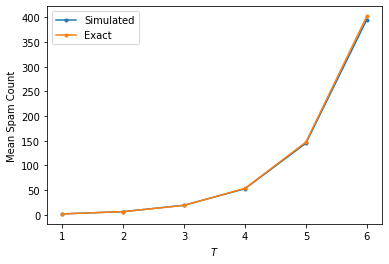

In [10]:
fig, ax = plt.subplots()
df_rslts.plot(ax = ax, x='T', y = 'simulated_mean_spam_cnt', marker='.', label='Simulated')
df_rslts.plot(ax = ax, x='T', y = 'exact_mean_spam_cnt', marker='.', label='Exact')
ax.legend()
ax.set_xlabel('$T$')
ax.set_ylabel('Mean Spam Count')
plt.show()